# Testing Loaders and Transforms for PNG Dataset

In [20]:
# imports
import os
import sys
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision import transforms


# Ensure src/ is in the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from src.data.loaders import get_dataloader, PngSpectrogramDataset

In [7]:
# Set root directory and parameters
root = "../data"
dataset_type = "png"
batch_size = 8

In [8]:
# Load dataloaders
splits = {}
for split in ["train", "val", "test"]:
    dataloader = get_dataloader(dataset_type=dataset_type, split=split, root=root, batch_size=batch_size)
    splits[split] = dataloader
    print(f"Loaded {split} split: {len(dataloader.dataset)} samples, {len(dataloader)} batches")


Loaded train split: 9758 samples, 1220 batches
Loaded val split: 2291 samples, 287 batches
Loaded test split: 1955 samples, 245 batches


In [9]:
# Print class distribution for train split
class_counts = {}
for _, labels in splits["train"]:
    for label in labels:
        class_counts[int(label)] = class_counts.get(int(label), 0) + 1

print("\nClass distribution in train split:")
for cls, count in sorted(class_counts.items()):
    print(f"Class {cls}: {count} samples")


Class distribution in train split:
Class 0: 1395 samples
Class 1: 1390 samples
Class 2: 1399 samples
Class 3: 1391 samples
Class 4: 1395 samples
Class 5: 1396 samples
Class 6: 1392 samples


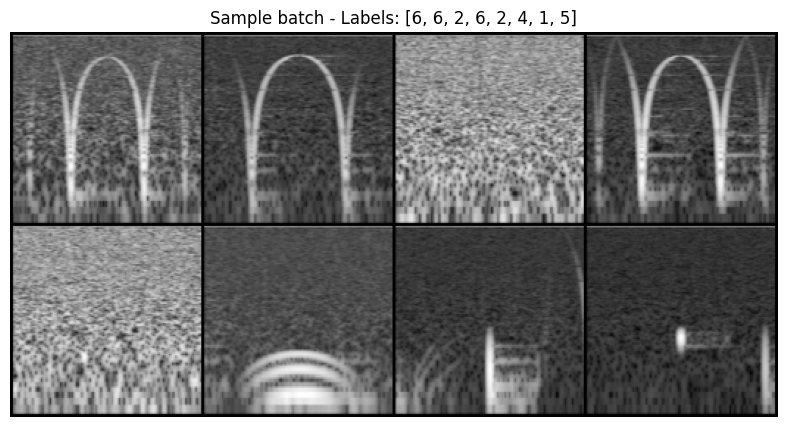

In [10]:
# Visualize a batch from the train split
images, labels = next(iter(splits["train"]))

def show_batch(img_batch, labels):
    grid_img = make_grid(img_batch, nrow=4, normalize=True)
    plt.figure(figsize=(10, 5))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.title(f"Sample batch - Labels: {labels.tolist()}")
    plt.axis("off")
    plt.show()

show_batch(images, labels)

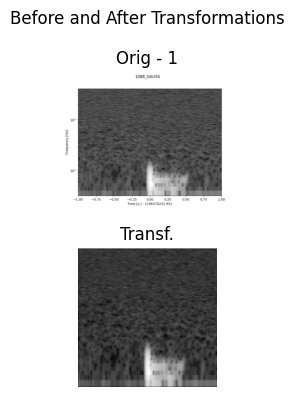

In [26]:
from src.data.loaders import PngSpectrogramDataset
import matplotlib.pyplot as plt

def tensor_transform(x):
    """Convert PIL Image to tensor and normalize."""
    return transforms.ToTensor()(x)

# Paths
train_path = os.path.join(root, "png", "train")



# Load datasets
raw_dataset = PngSpectrogramDataset(train_path, transform=tensor_transform)  # no transform
transformed_dataset = PngSpectrogramDataset(train_path)  # uses default transform
batch_size = 1

# Select N consistent indices
indices = torch.randint(0, len(raw_dataset), (batch_size,)).tolist()

plt.figure(figsize=(16, 4))
for i, idx in enumerate(indices):
    raw_img, label = raw_dataset[idx]
    transformed_img, _ = transformed_dataset[idx]

    # Original
    plt.subplot(2, batch_size, i + 1)
    plt.imshow(raw_img.squeeze(0).numpy(), cmap="gray")
    plt.title(f"Orig - {label}")
    plt.axis("off")

    # Transformed
    plt.subplot(2, batch_size, i + 1 + batch_size)
    plt.imshow(transformed_img.squeeze(0).numpy(), cmap="gray")
    plt.title("Transf.")
    plt.axis("off")

plt.suptitle("Before and After Transformations")
plt.tight_layout()
plt.show()
